In [14]:
import seaborn as sns
iris = sns.load_dataset('iris')
X = iris.drop('species', axis=1)
y = iris['species']

In [15]:
from sklearn.preprocessing import LabelEncoder
classle = LabelEncoder()
y = classle.fit_transform(iris['species'].values) #species 열의 문자형->범주형

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state= 123, stratify = y)

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
cld = LinearDiscriminantAnalysis(store_covariance=True) 
#store 뭐시기 -> covariance(판별함수에서 우리가 추정하고자 하는 모수) 값을 찍어보고 싶으면 필요함, default=False

In [22]:
cld.fit(X_train, y_train)
y_train_pred = cld.predict(X_train) 
y_test_pred = cld.predict(X_test) #학습할 때 쓴 적이 없는 데이터를 넣어서 LDA함수를 검증해보겠다


In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.9714285714285714
0.9777777777777777


In [24]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


In [25]:
#fit_transform => 내가 실제로 x라는 훈련 데이터를 넣었는데 분명히 우리는 LDA를 사용해서 사용하는 특정 사용 축을 기준으로
#차원 축소해서 사용이 가능함. 사용된 데이터를 구하고 싶은 거 -> fit_transform 이렇게 나오는 X_LDA데이터를 plot

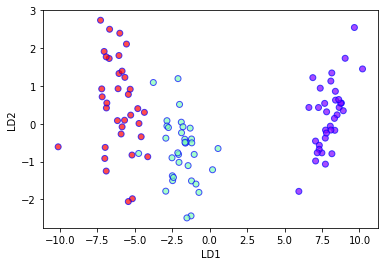

In [27]:
X_lda = cld.fit_transform(X_train, y_train)

from matplotlib import pyplot as plt
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c = y_train,
    cmap = 'rainbow',
    alpha = 0.7,
    edgecolors='b'
)

In [28]:
# 아이리스 데이터는 N = 150, n_features(독립변수의 차원) = 5 
# Y class = 1, 2, 3
# LDA 함수를 호출할 때 n_components 호출할 수 있음 -> 150*5를 150*3으로 바꾸고 싶을 때
# n_components=3 으로 바꿔진다. default 값은 메뉴얼에 써져있는데, n_class-1, n_features 중에 작은 걸ㄹ로 -> 지금은 2로 설정
# LDA component 차원 높이는 게 성능 향상에 도움 될 거 같으면 component 늘리면 된다.
